# Activation Functions in Neural Networks

In [104]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Introduction

### Introduction

Activation functions are fundamental components of perceptrons and artificial neural networks.
They determine whether a neuron activates (fires) or remains inactive, and thus control how information flows through the network.

Each neuron performs two main operations:
1. **Weighted Summation:**
  It computes the weighted sum of inputs plus a bias term.
  $$z = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$
2. **Activation:**
  The result z is passed through an activation function, which transforms it into the neuron’s output signal.


Neurons in the hidden layer use non-linear activation function, and neurons in the output layer use linear or non-linear activation function.

### Purpose of Activation Functions

1. **Introduce Non-Linearity**

    - **Without activation** functions, neural networks behave as purely **linear models, regardless of how many layers** they have.
      - **Multiple linear transformations collapse into one** — meaning the network can only learn linear relationships.
    - **Non-linear activation function**s enable the network to **capture complex, non-linear patterns** found in real-world data (e.g., speech, vision, language).
      - To enable **learning of complex, nonlinear relationships, non-linear activation functions** (like sigmoid, tanh, ReLU, etc.) are inserted between layers.

2.	**Control Output Range**

  - Many activation functions normalize outputs to a specific range (e.g., between -1 and +1, or 0 and 1), which **helps stabilize learning and gradient updates.**

3.	**Enable Gradient-Based Learning**
    
    - A good activation function should efficiently normalize outputs often between 1 and -1 and allow for effective gradient-based learning (differentiability); performance and speed can be greatly impacted by this choice because deep networks may be trained on millions of datapoints.
      - Differentiability is crucial — it allows the model to update weights through backpropagation efficiently.

4. **Better approximates arbitrary complex functions**

### Why Linear Layers Alone Are Not Enough?

Adding more linear layers does not increase model expressivity.
Even with hidden layers, the overall mapping remains linear if no non-linear activations are applied:

$$y = W_2 (W_1x + b_1) + b_2 = (W_2W_1)x + (W_2b_1 + b_2)$$

This is still a single linear transformation.

Hence, **depth only becomes me**aningful when non-linear activation functions separate the layers.

To understand why non-linear activation functions are indispensable, consider what happens if all activations in a network are purely linear.

Let the activations in each layer be represented by a function $g(\cdot)$, where the forward propagation equations are:
$$
h^{(1)} = g(z^{(1)}), \quad z^{(1)} = W^{(1)}x + b^{(1)}
$$

$$
h^{(2)} = g(z^{(2)}), \quad z^{(2)} = W^{(2)}a^{(1)} + b^{(2)}
$$

If the activation function g is linear, that is g(z) = z, the equations simplify to:

$$
a^{(1)} = W^{(1)}x + b^{(1)}
$$
$$
a^{(2)} = W^{(2)}a^{(1)} + b^{(2)} = W^{(2)}(W^{(1)}x + b^{(1)}) + b^{(2)} = W’x + b’
$$

where
$$
W’ = W^{(2)}W^{(1)}
$$

and
$$
b’ = W^{(2)}b^{(1)} + b^{(2)}.
$$
This shows that no matter how many layers are added, the overall transformation remains linear with respect to the input x. Thus, stacking multiple linear layers provides no additional modeling power beyond a single linear transformation — effectively reducing the network to a linear regression model.

### Activation Function and Output Range

The activation function determines the output scale of each neuron.
  - In **binary classification, the sigmoid function** is commonly used in the output layer because it outputs values between 0 and 1.
  - In **regression tasks, a linear activation** is used since outputs can take any real value.
  - In **hidden layers, non-linear activations** like ReLU, tanh, or Leaky ReLU are used to introduce nonlinearity.

### Common Activation Functions

|Function|	Output Range|	Key Features|	Limitations|
|--------|-------------|-------------|------------|
|Sigmoid	|(0, 1)|	Smooth, interpretable as probability|	Saturates for large inputs → vanishing gradients|
|Tanh|	(-1, 1)|	Zero-centered, stronger gradients|	Still suffers from saturation|
|ReLU (Rectified Linear Unit)|	[0, ∞)|	Simple, fast, effective|	“Dying ReLU” problem — neurons stop firing|
|Leaky ReLU|	(-∞, ∞)|	Small slope for negatives prevents dying neurons|	May introduce noise|
|Parametric ReLU (PReLU)|	(-∞, ∞)|	Learns the negative slope|	Slightly higher computational cost|
Softplus|	(0, ∞)|	Smooth approximation to ReLU|	Computationally heavier|
ELU (Exponential Linear Unit)|	(-1, ∞)|	Reduces bias shift, smooth gradient|	Needs careful initialization|
GELU (Gaussian Error Linear Unit)|	(-∞, ∞)	|Smooth, stochastic activation used in transformers	|Computationally expensive|

### Role of Activation in Model Architecture

Each layer in a neural network typically includes:
1.	Weighted sum of inputs
2.	Non-linear activation function
3.	Output transmission to the next layer

**Example:**

For neuron i:
$$
\text{Output}_i = f(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n)
$$

The choice of activation function in the final layer depends on the task:
- Linear → Regression
- Sigmoid → Binary Classification
- Softmax → Multi-Class Classification
- Activation functions introduce non-linearity, allowing neural networks to learn complex relationships.
  - Without them, the network behaves like a simple linear model.
- The choice of activation significantly affects model performance, convergence, and training stability.
  - Common hidden-layer activations: ReLU, Leaky ReLU, Tanh.
  - Common output activations: Sigmoid, Softmax, Linear.

#### **Desirable Properties of Activation Functions**

- **Smoothness**: The function should not have abrupt jumps or discontinuities—smoothness ensures steady changes and enables gradient-based training like backpropagation.
- **Non-linearity**: They transform linear combinations of inputs into non-linear outputs. Non-linearity lets neural networks represent multiple, complex decision boundaries in a compact form, making them powerful universal approximators.
- **Differentiability**: For efficient learning, the activation function must be differentiable almost everywhere so gradients can be computed for parameter updates.

**Logistic (Sigmoid) Function**:
  $$
  f(x) = \frac{1}{1 + e^{-x}}
  $$
  - Maps input to the range (0, 1)
  - Smooth, continuous, and non-linear, often used in output layers for binary classification


### Linear Activation in Output Layers





Although non-linear functions are crucial in hidden layers, linear activations are often used in the output layer for regression problems, where the target variable is continuous and unrestricted.


## Step (Heaviside) Function:

One of the earliest activation functions used in perceptrons is the Step (Heaviside) function, defined as:
$$
f(z) =
\begin{cases}
1, & \text{if } z \geq 0 \\
0, & \text{if } z < 0
\end{cases}
$$
This function produces a binary output—either 1 or 0—based on whether the neuron’s input exceeds a threshold. Conceptually, it models a neuron that “fires” (outputs 1) when activated and remains “off” (outputs 0) otherwise.

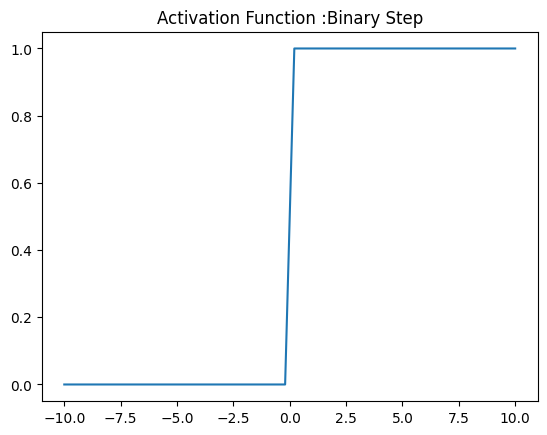

In [105]:
def binaryStep(x):
  '''It returns 'O' if the input is less then zero otherwise it returns one'''
  return np.heaviside(x,1)
x = np. linspace(-10, 10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Activation Function :Binary Step')
plt. show()

### Limitations

- While simple and biologically inspired, the step function has several limitations:
  - It is **non-differentiable** at z = 0 and has a **zero derivative** everywhere else.
- This makes it **unsuitable for training** neural networks using gradient based methods like backpropagation, as gradients cannot be propagated through the function.
  - The **output changes abruptly even a small variation in input** can cause a large jump in output from 0 to 1, making the **learning process unstable**.
  - Because it acts as a hard threshold, **it does not capture intermediate activation strengths**, thereby restricting model expressiveness.

Using only the step function keeps the model strictly linear, as it does not allow smooth transitions or nonlinear feature learning.

To overcome this, continuous and differentiable activation functions—such as the sigmoid in logistic regression—are used. These allow the network to model non-linear relationships and enable gradient-based optimization for effective learning.

In summary, while the step function laid the foundation for early perceptron models, modern neural networks rely on differentiable, non-linear activation functions that allow smoother learning and richer feature representation.

## Sigmoid Function


The Sigmoid (Logistic) activation function is one of the **most fundamental non-linear functions used in neural networks, particularly in binary classification tasks.** It maps any real-valued input to a smooth range between 0 and 1, introducing non-linearity into the network. The function is mathematically defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- This function produces an **S-shaped (sigmoid) curve that smoothly squashes large negative inputs** close to 0 and large positive inputs close to 1.
- Although it never reaches these extremes exactly, it asymptotically approaches them as $z \to -\infty$ or $z \to +\infty$.

### Intuitive Understanding

- The sigmoid function behaves almost linearly near the origin ($z \approx 0$), where **moderate changes in input lead to proportionate changes in output**.
  - However, as **inputs move farther from zero, the curve flattens out, creating zones of saturation** where further increases in z have little to no effect on the output.

- This characteristic makes sigmoid a `squashing` function it **compresses a wide range of input values into a limited output interval**, which is particularly useful for probability modeling.

### Properties and Role in Neural Networks

The sigmoid function serves two major purposes:

1.	It **introduces non-linearity**, enabling neural networks to model **complex and non-linear relationships** that linear models cannot capture.
2.	It **constrains outputs to a bounded range (0, 1)**, making it especially suitable for representing probabilities in binary classification problems.

- When designing a neural network, the **choice of activation functions for hidden and output layers is crucial.** While the sigmoid was historically popular, it has gradually been replaced in hidden layers by alternatives like ReLU or tanh, **which often yield faster convergence and better gradient propagation.**

- However, **sigmoid still remains valuable in output layers for probabilistic interpretation**.

### Mathematical Behavior and Gradient


The sigmoid function $g(z)$ is defined as:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Its derivative with respect to $z$ is:

$$
\frac{d}{dz} g(z) = g(z) \times (1 - g(z))
$$

The derivative of the sigmoid function has an elegant form, directly related to the function itself:
$$
\sigma’(z) = \sigma(z) \times (1 - \sigma(z))
$$

- This property simplifies backpropagation, as once the output $\sigma(z)$ is computed, its gradient can be obtained efficiently without additional complex calculations. This makes training computationally straightforward.

- Sanity check of derivative behavior:
  - As $z \to +\infty$, $\sigma(z) \to 1$, so $\sigma’(z) \to 0$.
  - As $z \to -\infty$, $\sigma(z) \to 0$, so $\sigma’(z) \to 0$.
  - At z = 0, $\sigma(0) = 0.5$, and $\sigma’(0) = 0.25$, representing the maximum slope.

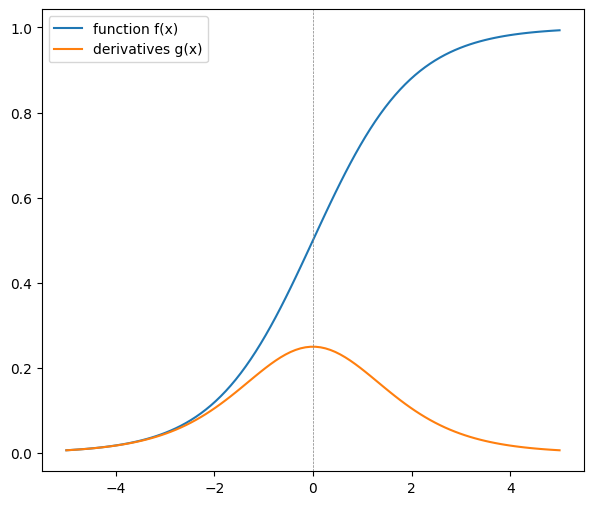

In [106]:
# activation function
def sigmoid(x): return 1. / (1. + np.exp(-x))


# Numerical Differentiation
def num_differentiation(f, x, h):
    return (f(x+h) - f(x-h)) / (2. * h)

x = np.linspace(-5, 5, 100)

h = 1e-08
f = sigmoid
fx = f(x)
gx = num_differentiation(f, x, h)

# Visualization
plt.figure(figsize=(7,6))
plt.plot(x, fx, label='function f(x)')
plt.plot(x, gx, label='derivatives g(x)')
plt.axvline(x=0, ls='--', lw=0.5, c='gray')
plt.legend()
plt.show()

### Limitations – Vanishing Gradient Problem

Despite its smoothness and interpretability, the sigmoid function suffers from a critical drawback known as the vanishing gradient problem.
- For **very large positive or negative values of z** (e.g., |z| > 5), the function’s output saturates near 0 or 1. In these regions, the **gradient $\sigma’(z)$ becomes extremely small, nearly zero.**
  - Consequently, the **weight updates during backpropagation also become minimal**, slowing down or completely stalling learning in deep networks.
  - This issue makes **sigmoid less suitable for hidden layers in deep architectures**, where many layers amplify the gradient shrinkage effect.
- Nevertheless, **it remains highly interpretable and is still preferred for output layers** where probabilistic outputs are needed.

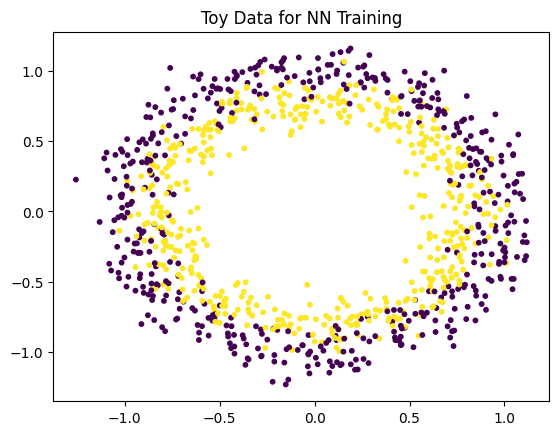

In [107]:
# Generate toy data for binary classification
X, y = make_circles(n_samples=1000, random_state=42, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.title("Toy Data for NN Training")
plt.show()

In [108]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670,), (330,))

In [109]:
# Deep Network Construction
def get_model(inp_activation):
    model = Sequential()
    for _ in range(11):  # 11 hidden layers
        model.add(Dense(10, input_dim=2 if _ == 0 else None, activation=inp_activation))
    model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [110]:
# Helper function to compute gradients and percent changes (using weights before & after epoch)
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
    gradient = (old_weight - new_weight) / learning_rate
    pct_change_weight = np.abs(100 * (old_weight - new_weight) / (old_weight + 1e-10))
    return gradient, pct_change_weight

In [111]:
# Build and inspect the deep sigmoid network
sigmoid_model = get_model("sigmoid")
sigmoid_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
sigmoid_model.get_weights()[0]
sigmoid_model.get_weights()[0].shape

(2, 10)

In [113]:
sigmoid_model.get_weights()[0]

array([[-0.21022916, -0.29646784,  0.02975398, -0.19520414,  0.4692363 ,
         0.25731778,  0.04589689,  0.5494656 ,  0.06703526,  0.15428275],
       [ 0.24266994, -0.50583196, -0.42574537,  0.34938115, -0.1308425 ,
         0.15833944, -0.35352185,  0.0337404 ,  0.18866599, -0.0725317 ]],
      dtype=float32)

In [114]:
sigmoid_model.get_weights()[1]
sigmoid_model.get_weights()[1].shape

(10,)

In [115]:
count = 0
for i in range(0, len(sigmoid_model.get_weights()), 2):
  print(f'Layer_{count} shape of weights is: {sigmoid_model.get_weights()[i].shape}')
  print(f'Layer_{count} shape of bias is: {sigmoid_model.get_weights()[i+1].shape}')
  print('\n')
  count += 1

Layer_0 shape of weights is: (2, 10)
Layer_0 shape of bias is: (10,)


Layer_1 shape of weights is: (10, 10)
Layer_1 shape of bias is: (10,)


Layer_2 shape of weights is: (10, 10)
Layer_2 shape of bias is: (10,)


Layer_3 shape of weights is: (10, 10)
Layer_3 shape of bias is: (10,)


Layer_4 shape of weights is: (10, 10)
Layer_4 shape of bias is: (10,)


Layer_5 shape of weights is: (10, 10)
Layer_5 shape of bias is: (10,)


Layer_6 shape of weights is: (10, 10)
Layer_6 shape of bias is: (10,)


Layer_7 shape of weights is: (10, 10)
Layer_7 shape of bias is: (10,)


Layer_8 shape of weights is: (10, 10)
Layer_8 shape of bias is: (10,)


Layer_9 shape of weights is: (10, 10)
Layer_9 shape of bias is: (10,)


Layer_10 shape of weights is: (10, 10)
Layer_10 shape of bias is: (10,)


Layer_11 shape of weights is: (10, 1)
Layer_11 shape of bias is: (1,)




In [116]:
# Extract initial first layer weights before training
first_layer_weights_before = sigmoid_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.21022916, -0.29646784,  0.02975398, -0.19520414,  0.4692363 ,
         0.25731778,  0.04589689,  0.5494656 ,  0.06703526,  0.15428275],
       [ 0.24266994, -0.50583196, -0.42574537,  0.34938115, -0.1308425 ,
         0.15833944, -0.35352185,  0.0337404 ,  0.18866599, -0.0725317 ]],
      dtype=float32)

In [117]:
# Train for one epoch only to highlight slow (vanishing) updates
history = sigmoid_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = sigmoid_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.21022762, -0.2964676 ,  0.02975483, -0.19520324,  0.46923572,
         0.25731942,  0.04589627,  0.5494639 ,  0.06703272,  0.15428467],
       [ 0.24266857, -0.50583297, -0.42574638,  0.3493795 , -0.13084377,
         0.1583385 , -0.35352176,  0.033743  ,  0.18867171, -0.07253414]],
      dtype=float32)

In [118]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [119]:
# Calculate change and percent change in weights
s_gradient, s_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
s_gradient

array([[-1.5348195e-03, -2.3841856e-04, -8.4377819e-04, -8.9406961e-04,
         5.9604645e-04, -1.6391276e-03,  6.2212342e-04,  1.6689299e-03,
         2.5331972e-03, -1.9222497e-03],
       [ 1.3709067e-03,  1.0132790e-03,  1.0132790e-03,  1.6391276e-03,
         1.2665986e-03,  9.3877310e-04, -8.9406960e-05, -2.5965271e-03,
        -5.7220454e-03,  2.4363399e-03]], dtype=float32)

In [120]:
s_weight_change

array([[7.3006982e-04, 8.0419712e-05, 2.8358498e-03, 4.5801778e-04,
        1.2702479e-04, 6.3700526e-04, 1.3554808e-03, 3.0373695e-04,
        3.7789030e-03, 1.2459266e-03],
       [5.6492654e-04, 2.0031928e-04, 2.3800117e-04, 4.6915174e-04,
        9.6803304e-04, 5.9288647e-04, 2.5290365e-05, 7.6956032e-03,
        3.0328974e-03, 3.3590000e-03]], dtype=float32)

In [121]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", s_gradient)
print("\nPercent Change in First Layer Weights:\n", s_weight_change)


First Layer Weights (Before Training):
 [[-0.21022916 -0.29646784  0.02975398 -0.19520414  0.4692363   0.25731778
   0.04589689  0.5494656   0.06703526  0.15428275]
 [ 0.24266994 -0.50583196 -0.42574537  0.34938115 -0.1308425   0.15833944
  -0.35352185  0.0337404   0.18866599 -0.0725317 ]]

First Layer Weights (After Training):
 [[-0.21022762 -0.2964676   0.02975483 -0.19520324  0.46923572  0.25731942
   0.04589627  0.5494639   0.06703272  0.15428467]
 [ 0.24266857 -0.50583297 -0.42574638  0.3493795  -0.13084377  0.1583385
  -0.35352176  0.033743    0.18867171 -0.07253414]]

Calculated Gradient for First Layer:
 [[-1.5348195e-03 -2.3841856e-04 -8.4377819e-04 -8.9406961e-04
   5.9604645e-04 -1.6391276e-03  6.2212342e-04  1.6689299e-03
   2.5331972e-03 -1.9222497e-03]
 [ 1.3709067e-03  1.0132790e-03  1.0132790e-03  1.6391276e-03
   1.2665986e-03  9.3877310e-04 -8.9406960e-05 -2.5965271e-03
  -5.7220454e-03  2.4363399e-03]]

Percent Change in First Layer Weights:
 [[7.3006982e-04 8.04197

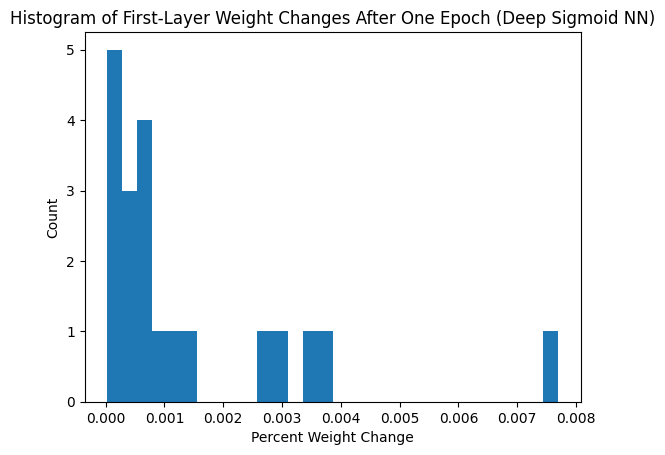

In [122]:
plt.hist(s_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Sigmoid NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

In summary, the sigmoid activation function provides a mathematically elegant and probabilistically meaningful non-linearity. While it paved the way for early neural networks, its saturation behavior limits its use in deep networks, leading to the adoption of other activations such as tanh and ReLU in modern architectures.

- Range: (0, 1)
- Derivative: $\sigma’(z) = \sigma(z)(1 - \sigma(z))$
- Advantages: Smooth, differentiable, interpretable as probabilities
- Limitations: Suffers from vanishing gradients for large |z|
- Best Used For: Output layer in binary classification

## Hyperbolic Tangent (tanh) Function


The hyperbolic tangent (tanh) activation function is defined as:
$$
\tanh(z) = \frac{\sinh(z)}{\cosh(z)} = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
$$

- Unlike the sigmoid function, which is asymmetric and ranges from 0 to 1, **tanh is symmetric around the origin and produces outputs between -1 and 1.** At z = 0, sigmoid yields 0.5 while tanh outputs 0, making it zero-centered and thus more suitable for hidden layers.

- For **large positive or negative values of z, tanh saturates at 1 or -1, causing its derivatives to become very small.** This leads to the vanishing gradient problem, where gradients approach zero and slow down learning in deep networks.

- Its **zero-centered output helps normalize activations, allowing faster convergence and more stable weight updates**—similar in spirit to data normalization in preprocessing.

- Mathematically, the sigmoid activation is given by:
$$
a = \frac{1}{1 + e^{-z}}
$$
and the hyperbolic tangent is:
$$
a = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

  - The **tanh function** can be viewed as a **shifted and scaled version of the sigmoid, centered at zero.** This centering effect makes it easier for subsequent layers to learn since activations can be both positive and negative.

  - While sigmoid activations remain useful for output layers in binary classification (as they map inputs to probabilities between 0 and 1), **tanh is generally preferred in hidden layers due to its symmetry and stronger gradient dynamics near the origin.**

  - Like sigmoid, tanh is smooth and differentiable, which makes it suitable for gradient-based optimization. **However, both suffer from saturation at extreme input values, where their gradients approach zero.**

- The hyperbolic tangent function is:

$$
g(z) = \tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
$$

- Its derivative is:

$$
g'(z) = 1 - g(z)^2
$$

- Sanity check:
  - For large z, $g(z) \to 1 \Rightarrow g’(z) \to 0$
  - For large negative z, $g(z) \to -1 \Rightarrow g’(z) \to 0$
  - At z = 0, $g(0) = 0 \Rightarrow g’(0) = 1$



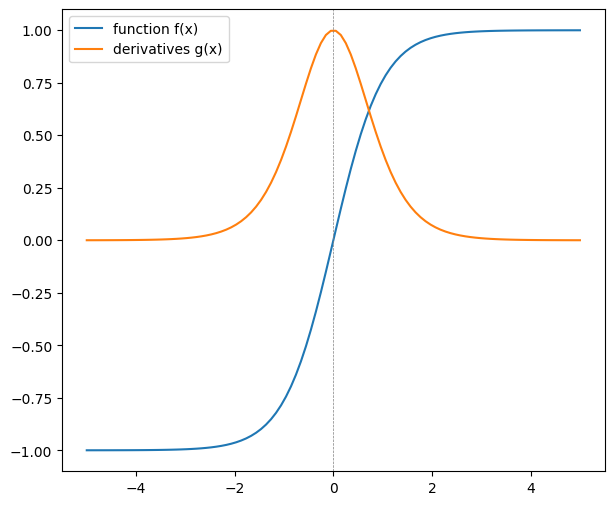

In [123]:
# activation function
def tanh(x): return np.tanh(x)

# Numerical Differentiation
def num_differentiation(f, x, h):
    return (f(x+h) - f(x-h)) / (2. * h)

x = np.linspace(-5, 5, 100)

h = 1e-08
f = tanh
fx = f(x)
gx = num_differentiation(f, x, h)

# Visualization
plt.figure(figsize=(7,6))
plt.plot(x, fx, label='function f(x)')
plt.plot(x, gx, label='derivatives g(x)')
plt.axvline(x=0, ls='--', lw=0.5, c='gray')
plt.legend()
plt.show()

In [124]:
# Build and inspect the deep network with tanh
tanh_model = get_model("tanh")
tanh_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
# Extract initial first layer weights before training
first_layer_weights_before = tanh_model.get_weights()[0].copy()
first_layer_weights_before

array([[ 0.01563752,  0.6569788 , -0.20815891,  0.45272428, -0.04533988,
         0.05071819, -0.6471667 , -0.33555922,  0.6873439 ,  0.02483833],
       [-0.686634  ,  0.39849013, -0.36587444, -0.03822803, -0.5383253 ,
        -0.14732414, -0.10088372,  0.07174891, -0.51395094, -0.3012854 ]],
      dtype=float32)

In [126]:
# Train for one epoch only to highlight slow (vanishing) updates
history = tanh_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = tanh_model.get_weights()[0].copy()
first_layer_weights_after

array([[ 0.01029991,  0.6576293 , -0.2114152 ,  0.44888237, -0.05131396,
         0.05642107, -0.6496142 , -0.33074218,  0.6846777 ,  0.03035751],
       [-0.68177193,  0.40519834, -0.35978633, -0.03166294, -0.5320946 ,
        -0.15361822, -0.10641428,  0.06526348, -0.5085267 , -0.30784175]],
      dtype=float32)

In [127]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [128]:
# Calculate change and percent change in weights
tanh_gradient, tanh_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
tanh_gradient

array([[ 5.3376117 , -0.65052503,  3.256291  ,  3.8419065 ,  5.97408   ,
        -5.702883  ,  2.447486  , -4.8170385 ,  2.6661751 , -5.519183  ],
       [-4.86207   , -6.7082043 , -6.0881076 , -6.5650973 , -6.2307115 ,
         6.294071  ,  5.530558  ,  6.485432  , -5.4242606 ,  6.5563617 ]],
      dtype=float32)

In [129]:
tanh_weight_change

array([[34.133373  ,  0.09901767,  1.5643295 ,  0.8486196 , 13.176215  ,
        11.244256  ,  0.37818477,  1.4355257 ,  0.3878954 , 22.22043   ],
       [ 0.70810217,  1.6834055 ,  1.6639882 , 17.173515  ,  1.157425  ,
         4.2722607 ,  5.4821124 ,  9.039067  ,  1.0554044 ,  2.17613   ]],
      dtype=float32)

In [130]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", tanh_gradient)
print("\nPercent Change in First Layer Weights:\n", tanh_weight_change)


First Layer Weights (Before Training):
 [[ 0.01563752  0.6569788  -0.20815891  0.45272428 -0.04533988  0.05071819
  -0.6471667  -0.33555922  0.6873439   0.02483833]
 [-0.686634    0.39849013 -0.36587444 -0.03822803 -0.5383253  -0.14732414
  -0.10088372  0.07174891 -0.51395094 -0.3012854 ]]

First Layer Weights (After Training):
 [[ 0.01029991  0.6576293  -0.2114152   0.44888237 -0.05131396  0.05642107
  -0.6496142  -0.33074218  0.6846777   0.03035751]
 [-0.68177193  0.40519834 -0.35978633 -0.03166294 -0.5320946  -0.15361822
  -0.10641428  0.06526348 -0.5085267  -0.30784175]]

Calculated Gradient for First Layer:
 [[ 5.3376117  -0.65052503  3.256291    3.8419065   5.97408    -5.702883
   2.447486   -4.8170385   2.6661751  -5.519183  ]
 [-4.86207    -6.7082043  -6.0881076  -6.5650973  -6.2307115   6.294071
   5.530558    6.485432   -5.4242606   6.5563617 ]]

Percent Change in First Layer Weights:
 [[34.133373    0.09901767  1.5643295   0.8486196  13.176215   11.244256
   0.37818477  1.4

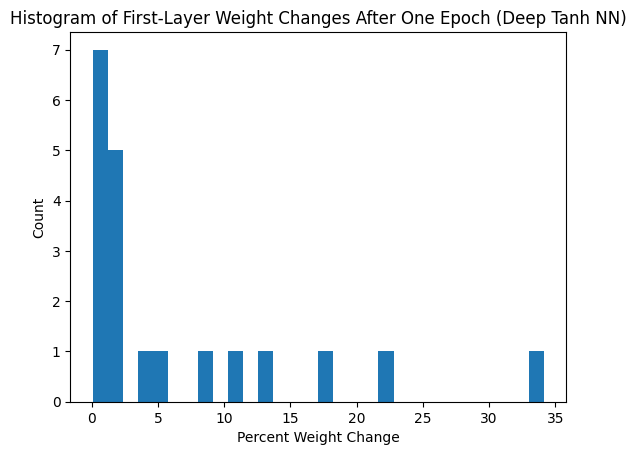

In [131]:
plt.hist(tanh_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Tanh NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

## Rectified Linear Unit (ReLU) Activation Function

To overcome the limitations of sigmoid and tanh activations—particularly the vanishing gradient problem—the Rectified Linear Unit (ReLU) became the default activation function in modern deep learning.

- ReLU increases training speed and avoids vanishing gradients for positive $z$, but it can cause "dying ReLU"—neurons that always output zero for negative input and thus stop learning.

- It is defined as:
$$
\mathrm{ReLU}(z) = \max(0, z)
$$

- This means:
  - For z < 0, the output is 0
  - For z > 0, the output is z

### Non linearity of ReLU

ReLU introduces **non-linearity while maintaining computational simplicity.**
- ReLU is a nonlinear activation **widely used in deep and multilayer neural networks due to its simplicity and effectiveness** for complex pattern learning.
- Unlike linear activations, ReLU sets all negative values to zero, **promoting sparsity and reducing computational burden**.


- Mathematically, the derivative is:
$$
g'(z) =
\begin{cases}
0, & z < 0 \\
1, & z > 0 \\
\text{undefined}, & z=0
\end{cases}
$$
- **In practice**, the derivative at z = 0 is assigned either 0 or 1, as it has negligible effect on learning.
  - Unlike sigmoid or tanh, **it does not saturate for large positive inputs** and thus helps preserve gradient flow during backpropagation.
  - For positive inputs, **the derivative is always 1,** ensuring gradients do not vanish as they propagate through deep layers.

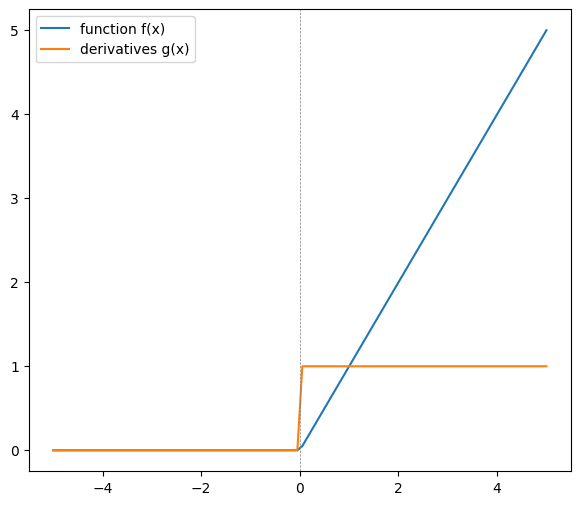

In [132]:
# activation function
def relu(x): return np.maximum(0, x)

# Numerical Differentiation
def num_differentiation(f, x, h):
    return (f(x+h) - f(x-h)) / (2. * h)

x = np.linspace(-5, 5, 100)

h = 1e-08
f = relu
fx = f(x)
gx = num_differentiation(f, x, h)

# Visualization
plt.figure(figsize=(7,6))
plt.plot(x, fx, label='function f(x)')
plt.plot(x, gx, label='derivatives g(x)')
plt.axvline(x=0, ls='--', lw=0.5, c='gray')
plt.legend()
plt.show()

### Advantages

  - **Prevents Unstable Gradients:**  
    - ReLU **mitigates the vanishing gradient problem** common with sigmoid activation in deep networks, as its derivative is 1 for positive inputs and 0 otherwise.
    - **Non-saturating nature** allows for more stable and efficient training of very deep models.
  - **Efficient Learning:**  
    - **Not all neurons activate simultaneously**, leading to sparse representations and faster computation.
    - Simpler derivative, **facilitating fast backpropagation** and weight updates.
  - **Simplified Computation:**  
    - Compared to sigmoid or tanh, **ReLU requires fewer mathematical operations** for both forward and backward passes.

### Why ReLU is Preferred?

- Prevents vanishing gradients for positive inputs
- Encourages sparse activations, improving efficiency and generalization
- Simplifies computation in both forward and backward passes
- Speeds up training and enhances convergence in deep architectures
- Frequently yields better performance than sigmoid or tanh in practice

#### Example in a Neural Layer









For a given neuron:
	•	Weighted input:
$$
z_2 = W_{12}x_1 + b_2
$$
	•	Activation:
$$
a_2 = \mathrm{ReLU}(z_2)
$$
	•	The next layer then computes:
$$
z_3 = W_{23}a_2 + b_3
$$

The network continues layer by layer, with ReLU activations in hidden layers and a suitable activation (e.g., sigmoid or softmax) at the output layer depending on the task.

During backpropagation, the weight update rule remains:
$$
W_\text{new} = W_\text{old} - \alpha \frac{\partial J}{\partial W}
$$
Here, weights corresponding to neurons with negative inputs (z < 0) do not update since their gradients are zero—this contributes to sparsity in learned representations.

In [133]:
# Build and inspect the deep sigmoid network
relu_model = get_model("relu")
relu_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# Extract initial first layer weights before training
first_layer_weights_before = relu_model.get_weights()[0].copy()
first_layer_weights_before

array([[ 6.7035168e-01, -2.7267191e-01, -3.3775523e-01, -5.1399326e-01,
         2.0892662e-01,  3.4593302e-01, -4.2693341e-01, -3.6327025e-01,
         6.4025968e-01, -2.1313339e-01],
       [ 1.7160177e-04, -5.1757038e-01,  1.2973189e-01, -5.4664695e-01,
         5.9853417e-01, -4.1356340e-01, -1.8589813e-01, -6.5844113e-01,
        -1.9490474e-01,  4.5092863e-01]], dtype=float32)

In [135]:
# Train for one epoch only to highlight slow (vanishing) updates
history = relu_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = relu_model.get_weights()[0].copy()
first_layer_weights_after

array([[ 0.66454464, -0.2773179 , -0.3402498 , -0.521433  ,  0.2177022 ,
         0.35061863, -0.43195996, -0.3639159 ,  0.6401822 , -0.21765225],
       [ 0.00347412, -0.51211643,  0.13840497, -0.54971826,  0.59612477,
        -0.41384688, -0.19116636, -0.66123813, -0.20004681,  0.45259574]],
      dtype=float32)

In [136]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [137]:
# Calculate change and percent change in weights
relu_gradient, relu_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
relu_gradient

array([[ 5.8070416 ,  4.6460032 ,  2.4945736 ,  7.439732  , -8.775577  ,
        -4.6856103 ,  5.026549  ,  0.64563745,  0.07748604,  4.5188513 ],
       [-3.3025205 , -5.4539437 , -8.673072  ,  3.071308  ,  2.4093986 ,
         0.2834797 ,  5.268231  ,  2.7970073 ,  5.1420627 , -1.667112  ]],
      dtype=float32)

In [138]:
relu_weight_change

array([[8.6626798e-01, 1.7038804e+00, 7.3857439e-01, 1.4474378e+00,
        4.2003155e+00, 1.3544849e+00, 1.1773614e+00, 1.7772925e-01,
        1.2102283e-02, 2.1201987e+00],
       [1.9245248e+03, 1.0537590e+00, 6.6853814e+00, 5.6184494e-01,
        4.0254986e-01, 6.8545640e-02, 2.8339345e+00, 4.2479235e-01,
        2.6382442e+00, 3.6970642e-01]], dtype=float32)

In [139]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", relu_gradient)
print("\nPercent Change in First Layer Weights:\n", relu_weight_change)


First Layer Weights (Before Training):
 [[ 6.7035168e-01 -2.7267191e-01 -3.3775523e-01 -5.1399326e-01
   2.0892662e-01  3.4593302e-01 -4.2693341e-01 -3.6327025e-01
   6.4025968e-01 -2.1313339e-01]
 [ 1.7160177e-04 -5.1757038e-01  1.2973189e-01 -5.4664695e-01
   5.9853417e-01 -4.1356340e-01 -1.8589813e-01 -6.5844113e-01
  -1.9490474e-01  4.5092863e-01]]

First Layer Weights (After Training):
 [[ 0.66454464 -0.2773179  -0.3402498  -0.521433    0.2177022   0.35061863
  -0.43195996 -0.3639159   0.6401822  -0.21765225]
 [ 0.00347412 -0.51211643  0.13840497 -0.54971826  0.59612477 -0.41384688
  -0.19116636 -0.66123813 -0.20004681  0.45259574]]

Calculated Gradient for First Layer:
 [[ 5.8070416   4.6460032   2.4945736   7.439732   -8.775577   -4.6856103
   5.026549    0.64563745  0.07748604  4.5188513 ]
 [-3.3025205  -5.4539437  -8.673072    3.071308    2.4093986   0.2834797
   5.268231    2.7970073   5.1420627  -1.667112  ]]

Percent Change in First Layer Weights:
 [[8.6626798e-01 1.703880

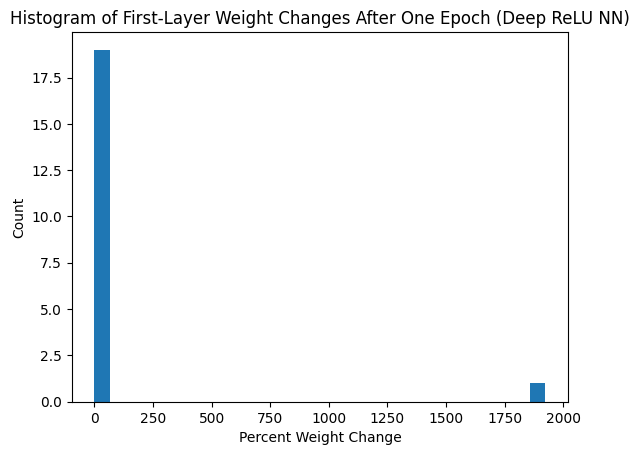

In [140]:
plt.hist(relu_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep ReLU NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

## Leaky ReLU (LReLU) Activation Function

While ReLU has become the default activation in deep neural networks due to its simplicity and computational efficiency, it is not without limitations.

- Its major drawback—the “dying ReLU” problem—occurs when neurons consistently receive negative inputs, causing their outputs and gradients to remain zero.
- These inactive neurons stop learning and contribute nothing to the network’s predictions.
- To address this issue, the Leaky ReLU (LReLU) introduces a small, non-zero slope for negative inputs instead of assigning them a flat zero. The function is defined as:

  $$
  f(z) =
  \begin{cases}
    z & \text{if } z \geq 0 \\
    \alpha z & \text{if } z < 0 \ \ (\alpha \ll 1)
  \end{cases}
  $$

where $0 < \alpha \ll 1$, typically $\alpha = 0.01$.

- This simple modification allows a small gradient to flow even when the neuron receives negative inputs, ensuring that no neuron completely “dies” during training.
- By maintaining non-zero gradients for all input ranges, Leaky ReLU helps mitigate both the vanishing gradient problem on the negative side and the dead neuron issue seen in standard ReLU.

For Leaky ReLU (with slope $\alpha$ on negative side, e.g. $\alpha=0.01$):

$$
g(z) = \max(\alpha z, z)
$$

Its derivative is:

$$
g'(z) =
\begin{cases}
\alpha, & z < 0 \\
1, & z > 0 \\
\text{undefined}, & z=0
\end{cases}
$$


As with ReLU, the derivative at z = 0 is undefined but practically set to either 0 or 1, which has negligible effect on learning.



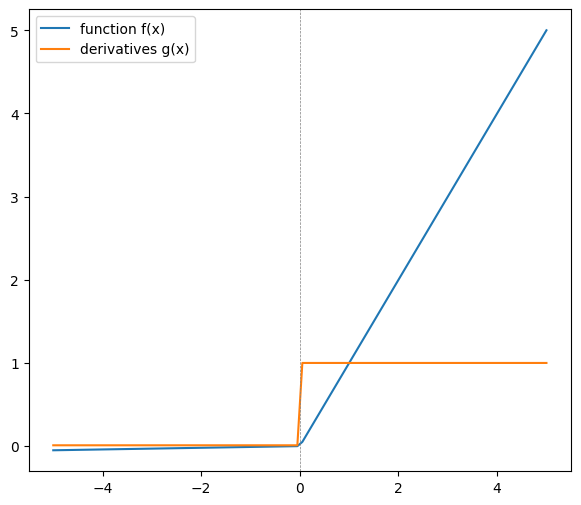

In [141]:
# activation function
def leaky_relu(x):
  alpha = 0.01
  return np.maximum(alpha*x, x)

# Numerical Differentiation
def num_differentiation(f, x, h):
    return (f(x+h) - f(x-h)) / (2. * h)

x = np.linspace(-5, 5, 100)

h = 1e-08
f = leaky_relu
fx = f(x)
gx = num_differentiation(f, x, h)

# Visualization
plt.figure(figsize=(7,6))
plt.plot(x, fx, label='function f(x)')
plt.plot(x, gx, label='derivatives g(x)')
plt.axvline(x=0, ls='--', lw=0.5, c='gray')
plt.legend()
plt.show()

- Leaky ReLU retains ReLU’s benefits—computational simplicity, sparse activation, and fast convergence—while improving robustness by keeping all neurons trainable.
- The small slope $\alpha$ ensures that the function remains nearly linear for positive inputs and slightly active for negatives.
- In implementation, Leaky ReLU is often expressed compactly as:
$$
f(z) = \max(\alpha z, z)
$$

- This form is easy to compute and well-supported across deep learning frameworks. Although Leaky ReLU alleviates ReLU’s limitations, neither activation is universally superior.

- The optimal choice often depends on the dataset, model depth, and initialization scheme. Hence, experimenting with both ReLU and Leaky ReLU is generally recommended to determine which provides better convergence and performance for a specific problem.

In [142]:
# Build and inspect the deep network with leaky relu
lrelu_model = get_model("leaky_relu")
lrelu_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
# Extract initial first layer weights before training
first_layer_weights_before = lrelu_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.41390565,  0.08151102,  0.27423102,  0.554975  ,  0.650683  ,
         0.5652643 ,  0.07781941,  0.21403605,  0.53363115,  0.27844197],
       [ 0.4901685 , -0.365282  ,  0.22694796,  0.28507757,  0.42244977,
         0.501555  ,  0.6039702 , -0.14250946, -0.41301247,  0.6891164 ]],
      dtype=float32)

In [144]:
# Train for one epoch only to highlight slow (vanishing) updates
history = lrelu_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = lrelu_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.41895625,  0.08865465,  0.27556652,  0.55062664,  0.6532664 ,
         0.565293  ,  0.07999592,  0.21831234,  0.53305733,  0.27853146],
       [ 0.4900079 , -0.3644322 ,  0.23078837,  0.29000592,  0.4176861 ,
         0.5001197 ,  0.60389465, -0.14917453, -0.41790536,  0.69028944]],
      dtype=float32)

In [145]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [146]:
# Calculate change and percent change in weights
lrelu_gradient, lrelu_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
relu_gradient

array([[ 5.8070416 ,  4.6460032 ,  2.4945736 ,  7.439732  , -8.775577  ,
        -4.6856103 ,  5.026549  ,  0.64563745,  0.07748604,  4.5188513 ],
       [-3.3025205 , -5.4539437 , -8.673072  ,  3.071308  ,  2.4093986 ,
         0.2834797 ,  5.268231  ,  2.7970073 ,  5.1420627 , -1.667112  ]],
      dtype=float32)

In [147]:
lrelu_weight_change

array([[1.22022963e+00, 8.76400661e+00, 4.86998767e-01, 7.83519566e-01,
        3.97026598e-01, 5.08247921e-03, 2.79688048e+00, 1.99793005e+00,
        1.07530065e-01, 3.21418419e-02],
       [3.27652059e-02, 2.32645795e-01, 1.69219482e+00, 1.72877526e+00,
        1.12762821e+00, 2.86177874e-01, 1.25136450e-02, 4.67692852e+00,
        1.18468225e+00, 1.70220792e-01]], dtype=float32)

In [148]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", lrelu_gradient)
print("\nPercent Change in First Layer Weights:\n", lrelu_weight_change)


First Layer Weights (Before Training):
 [[-0.41390565  0.08151102  0.27423102  0.554975    0.650683    0.5652643
   0.07781941  0.21403605  0.53363115  0.27844197]
 [ 0.4901685  -0.365282    0.22694796  0.28507757  0.42244977  0.501555
   0.6039702  -0.14250946 -0.41301247  0.6891164 ]]

First Layer Weights (After Training):
 [[-0.41895625  0.08865465  0.27556652  0.55062664  0.6532664   0.565293
   0.07999592  0.21831234  0.53305733  0.27853146]
 [ 0.4900079  -0.3644322   0.23078837  0.29000592  0.4176861   0.5001197
   0.60389465 -0.14917453 -0.41790536  0.69028944]]

Calculated Gradient for First Layer:
 [[ 5.050599   -7.1436315  -1.3355016   4.3483377  -2.5833843  -0.02872944
  -2.1765156  -4.2762904   0.5738139  -0.08949637]
 [ 0.1606047  -0.84981316 -3.8404016  -4.9283504   4.763663    1.4353393
   0.07557869  6.665066    4.8928857  -1.1730194 ]]

Percent Change in First Layer Weights:
 [[1.22022963e+00 8.76400661e+00 4.86998767e-01 7.83519566e-01
  3.97026598e-01 5.08247921e-03

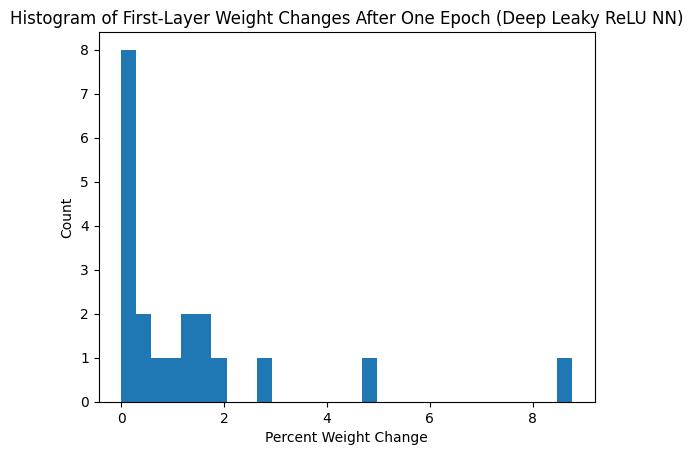

In [149]:
plt.hist(lrelu_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Leaky ReLU NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

## ReLU, Leaky ReLU and Parametric ReLU (PReLU)

The Parametric ReLU (PReLU) extends Leaky ReLU by **treating the negative slope $\alpha$ as a trainable parameter**, rather than a fixed constant. It is defined as:

$$
\text{PReLU}(x) =
\begin{cases}
x, & \text{if } x > 0 \\
\alpha x, & \text{if } x \leq 0
\end{cases}
$$

- In PReLU, the value of $\alpha$ is learned during training through backpropagation, similar to weights and biases. **This gives the model flexibility to automatically determine the optimal amount of “leakiness” for each neuron or layer.**

### Gradient with Respect to $\alpha$

- If the overall loss function is denoted by $\mathcal{L}$, the gradient with respect to $\alpha$ is computed as:

$$
\frac{\partial \mathcal{L}}{\partial \alpha} = \sum_{i: x_i \leq 0} \frac{\partial \mathcal{L}}{\partial y_i} \cdot x_i
$$

  where $y_i = \alpha x_i$ for negative inputs.
- This allows $\alpha$ to be updated adaptively during each training iteration.

### Advantages of PReLU

- **Adaptive Learning:**
Each neuron can learn its own slope $\alpha$, enabling layer-wise or neuron-wise flexibility.
- **Enhanced Performance:**
Particularly beneficial when the optimal level of negative activation varies across different layers or features.
- **Generalization of Leaky ReLU:**
PReLU encompasses Leaky ReLU as a special case when $\alpha$ is fixed. When $\alpha$ is learned, the model becomes more adaptive and expressive.

Both Leaky ReLU and PReLU help maintain gradient flow in deep networks and improve learning stability. While Leaky ReLU uses a constant slope, PReLU dynamically learns the optimal slope from data, offering an adaptive and potentially more powerful alternative.


| Function    | Formula for $$x > 0$$   | Formula for $$x \leq 0$$   | Slope for $$x \leq 0$$ | Slope is Learnable? |
|-------------|------------------------|---------------------------|----------------------|---------------------|
| ReLU        | $$x$$                  | $$0$$                     | 0                    | No                  |
| Leaky ReLU  | $$x$$                  | $$\alpha x$$              | small, fixed $\alpha$ | No               |
| PReLU       | $$x$$                  | $$\alpha x$$              | learned $\alpha$    | Yes                 |

## Swish Function

Swish represents a more recent innovation that **combines the advantages of both smooth and self-gated non-linearities**.

- Developed by Google researchers, Swish has been shown to outperform ReLU across a variety of deep learning tasks by **introducing a trainable smoothness factor that enhances the expressive capacity and convergence behavior of neural networks**.

**Mathematical Definition**

Swish is mathematically expressed as:

$$
f(x) = x \cdot \sigma(\beta x)
$$

where:
- $x$ denotes the input to the neuron.
- $\sigma(x)$ is the sigmoid function defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

- $\beta$ serves as **a hyperparameter that governs the degree of smoothness and gating**.


When $\beta = 1$, the function represents the standard sigmoid activation; when $\beta$ is made trainable, it enables a more flexible and adaptive response across neurons and layers.

### Interpretation and Characteristics

- **Self-gating behavior:** The sigmoid component acts as a gating mechanism, scaling the input adaptively. This allows Swish to smoothly interpolate between linear ($f(x) \approx x$ for large positive $x$) and suppressed ($f(x) \approx 0$ for large negative $x$) regions.
- **Learnable smoothness:** When $\beta$ is a trainable parameter, each neuron autonomously learns its optimal gating intensity, allowing for improved data-driven adaptability and representational flexibility.
- **Differentiability and gradient flow:** The derivative of Swish with respect to $x$ is:
$$
\frac{\partial f(x)}{\partial x} = \sigma(\beta x) + x \cdot \sigma’(\beta x) \cdot \beta
$$
where $\sigma’(z) = \sigma(z)(1 - \sigma(z))$.
This smooth derivative ensures non-zero gradients across both positive and negative inputs, mitigating the `dying neuron` problem observed in ReLU.

- **Performance benefits:** The smooth curvature and trainable gating of Swish facilitate better gradient propagation and feature learning, particularly in deep architectures.

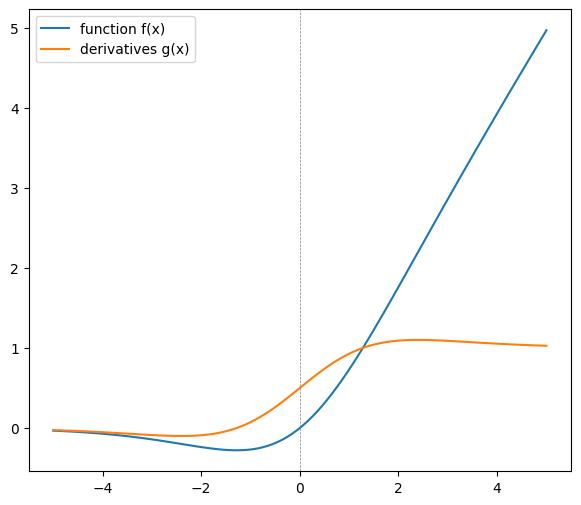

In [150]:
# activation function
def swish(x): return x*sigmoid(x)

# Numerical Differentiation
def num_differentiation(f, x, h):
    return (f(x+h) - f(x-h)) / (2. * h)

x = np.linspace(-5, 5, 100)

b = 1
h = 1e-08
f = swish
fx = f(x)
gx = num_differentiation(f, x, h)

# Visualization
plt.figure(figsize=(7,6))
plt.plot(x, fx, label='function f(x)')
plt.plot(x, gx, label='derivatives g(x)')
plt.axvline(x=0, ls='--', lw=0.5, c='gray')
plt.legend()
plt.show()

### Computational and Practical Aspects

- **Efficiency:** Despite its enhanced expressiveness, Swish remains computationally efficient, requiring only element-wise multiplication and a sigmoid evaluation.
- **Parameterization:** While introducing $\beta$ slightly increases parameter count, this learnable element contributes to improved model convergence, generalization, and robustness.

| Function   | Formula                          | Key Parameter | Trainable Parameter? | Slope for $$x < 0$$ | Nonlinearity |
|------------|----------------------------------|---------------|----------------------|---------------------|--------------|
| ReLU       | $$f(x) = \max(0, x)$$           | None          | No                   | 0                   | Yes          |
| Swish      | $$f(x) = x \cdot \sigma(\beta x)$$ | $$\beta$$      | Yes (optional)        | smooth, > 0         | Yes, smooth  |

In [151]:
# Build and inspect the deep network with swish
swish_model = get_model("swish")
swish_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)               │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
# Extract initial first layer weights before training
first_layer_weights_before = swish_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.17610216,  0.43313104, -0.14125097, -0.2036227 ,  0.18581682,
         0.04136682, -0.34621122,  0.3819241 , -0.10068864, -0.10039431],
       [-0.51676214, -0.36127096, -0.26135024,  0.7051789 , -0.11522239,
         0.2311812 , -0.42810273,  0.4503674 , -0.18724614,  0.47804326]],
      dtype=float32)

In [153]:
# Train for one epoch only to highlight slow (vanishing) updates
history = swish_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = swish_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.1788384 ,  0.4373775 , -0.14222483, -0.20466372,  0.18781619,
         0.04414248, -0.34742314,  0.38773137, -0.10025711, -0.10046921],
       [-0.5117045 , -0.35819572, -0.2548461 ,  0.7118813 , -0.1209055 ,
         0.2292431 , -0.43057594,  0.45197347, -0.19142674,  0.47844505]],
      dtype=float32)

In [154]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [155]:
# Calculate change and percent change in weights
swish_gradient, swish_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
swish_gradient

array([[ 2.7362404 , -4.2464733 ,  0.97386533,  1.0410249 , -1.9993632 ,
        -2.7756689 ,  1.2119114 , -5.80728   , -0.4315227 ,  0.07490069],
       [-5.0576324 , -3.0752418 , -6.504148  , -6.702363  ,  5.683109  ,
         1.9381045 ,  2.4732053 , -1.6060768 ,  4.180595  , -0.40179488]],
      dtype=float32)

In [156]:
swish_weight_change

array([[1.5537803 , 0.9804131 , 0.6894575 , 0.5112519 , 1.0759861 ,
        6.709893  , 0.35004973, 1.5205326 , 0.42857143, 0.07460651],
       [0.97871584, 0.85122865, 2.4886713 , 0.95044863, 4.932296  ,
        0.8383487 , 0.5777131 , 0.35661483, 2.2326736 , 0.0840499 ]],
      dtype=float32)

In [157]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", swish_gradient)
print("\nPercent Change in First Layer Weights:\n", swish_weight_change)


First Layer Weights (Before Training):
 [[-0.17610216  0.43313104 -0.14125097 -0.2036227   0.18581682  0.04136682
  -0.34621122  0.3819241  -0.10068864 -0.10039431]
 [-0.51676214 -0.36127096 -0.26135024  0.7051789  -0.11522239  0.2311812
  -0.42810273  0.4503674  -0.18724614  0.47804326]]

First Layer Weights (After Training):
 [[-0.1788384   0.4373775  -0.14222483 -0.20466372  0.18781619  0.04414248
  -0.34742314  0.38773137 -0.10025711 -0.10046921]
 [-0.5117045  -0.35819572 -0.2548461   0.7118813  -0.1209055   0.2292431
  -0.43057594  0.45197347 -0.19142674  0.47844505]]

Calculated Gradient for First Layer:
 [[ 2.7362404  -4.2464733   0.97386533  1.0410249  -1.9993632  -2.7756689
   1.2119114  -5.80728    -0.4315227   0.07490069]
 [-5.0576324  -3.0752418  -6.504148   -6.702363    5.683109    1.9381045
   2.4732053  -1.6060768   4.180595   -0.40179488]]

Percent Change in First Layer Weights:
 [[1.5537803  0.9804131  0.6894575  0.5112519  1.0759861  6.709893
  0.35004973 1.5205326  

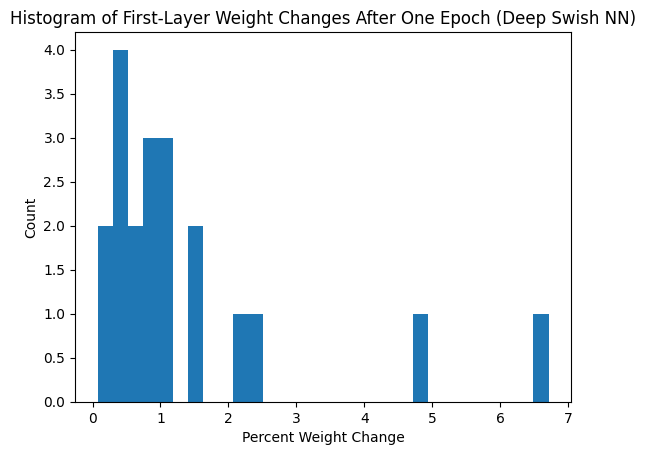

In [158]:
plt.hist(swish_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Swish NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

## Softmax Activation Function

It is specifically designed for the output layer of neural networks handling multi-class classification problems.
- While functions like ReLU or Swish operate elementwise within hidden layers to introduce nonlinearity, Softmax transforms a vector of raw model outputs into a probability distribution, enabling direct probabilistic interpretation of predictions.

### Purpose and Context

Softmax is primarily used in the output layer of neural networks where the task involves classifying an input into one of multiple possible categories (e.g., classifying an image as cat, dog, or bird).
It converts a vector of raw prediction scores (called logits) into a probability distribution over all classes by squashing the values between 0 and 1 and ensuring that the total probability sums to 1.

- Mathematically smooth and differentiable, Softmax is compatible with gradient-based optimization, making it ideal for backpropagation during network training.

### Mathematical Definition and Input and Output Structure

- **Input:** A vector of real-valued logits
$$
\mathbf{Z} = [z_1, z_2, \ldots, z_V]
$$
where V denotes the number of classes.
- **Output:** A probability vector
$
\hat{\mathbf{y}} = [\hat{y}_1, \hat{y}_2, \ldots, \hat{y}_V]
$
such that each $\hat{y}_i \in [0, 1]$ and
$$
\sum_{i=1}^V \hat{y}_i = 1
$$

  - This makes the output directly interpretable as class probabilities.

The Softmax transformation is defined as:

  $$
  \hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^V e^{z_j}}
  $$

Here:
- The exponential function $e^{z_i}$ ensures all values are positive.
- The denominator acts as a normalization term, ensuring that the outputs sum to one.

### Intuitive Understanding

Softmax highlights differences in the input scores while maintaining their relative order:
- A higher input score $z_i$ corresponds to a higher probability $\hat{y}_i$.
- Even small differences between logits become more pronounced after exponentiation, enabling the model to express clear class preferences.
- Thus, Softmax effectively converts arbitrary real numbers into a simplex of probabilities.

### Numerical Illustration

Suppose the raw scores (logits) are:

$$
\mathbf{Z} = [9, 14, 28]
$$

Exponentiating gives:
$$
[e^9, e^{14}, e^{28}]
$$

The denominator, $\sum e^{z_j} = e^9 + e^{14} + e^{28}$, normalizes these values.
Hence, the probability for the first class is:

$$
\hat{y}_1 = \frac{e^9}{e^9 + e^{14} + e^{28}}
$$

Because $e^{28}$ dominates, the third class will have a probability very close to 1, while others will be near 0. This reflects the model’s strong confidence in the third class.

## Gradient Stability in Deep Neural Networks: How gradients behave during backpropagation?

 The performance and stability of deep neural networks depend heavily on maintaining healthy gradient flow. When gradients either diminish to near zero (vanishing gradients) or grow excessively large (exploding gradients), learning can stall or destabilize.

### Vanishing Gradient Problem

The vanishing gradient problem occurs primarily in deep networks using saturating activation functions such as sigmoid or tanh.
- During backpropagation, gradients are propagated backward through multiple layers by repeated multiplication of partial derivatives.
- If these derivatives are small (less than 1), their repeated multiplication across layers causes the overall gradient to shrink exponentially, often approaching zero.
- As a result, early layers learn extremely slowly or stop updating altogether. This leads to underfitting and prevents the network from learning deep hierarchical representations.

#### Mathematical Intuition

Consider a neural network where each layer’s weights have a magnitude around 0.6.
- If the gradient is multiplied by 0.6 at each layer, then after 15 layers the effective scaling factor becomes:

$$
0.6^{15} \approx 0.00047
$$

- This shows how gradient signals decay exponentially with depth, leading to almost zero updates in earlier layers.

#### Impact and Detection

**Practical Impact**
- Gradients in the lower layers become insignificant.
- Training slows drastically or stops improving.
- Early layers remain poorly trained even when later layers converge.

**Detection**
- Training loss stagnates.
- Weights in initial layers barely change.
- Gradient magnitudes approach zero during monitoring.

**Root Cause**

- Sigmoid Activation: The sigmoid activation function, defined as

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

has a derivative:

$$
\sigma’(x) = \sigma(x)(1 - \sigma(x))
$$

Since $0 < \sigma’(x) < 0.25$, repeated multiplication of such small derivatives across layers quickly leads to vanishing gradients. The effect is even stronger when inputs lie in the saturated regions (far from zero), where derivatives approach zero.

#### Solutions and Mitigation Strategies

1. **Non-saturating Activations:**
Use activations like ReLU, Leaky ReLU, or ELU that maintain gradients > 0 for most input ranges.
2.	**Batch Normalization:**
Normalizes the input to each layer, keeping activations in a stable range and preserving gradient magnitude.
3.	**Residual Connections (ResNet):**
Allows direct gradient flow through skip connections, reducing vanishing effects in very deep models.
4.	**Layer-wise or Hierarchical Training:**
Train one layer (or block) at a time to prevent early gradient shrinkage.
5. **LSTM Units (in RNNs):**
LSTMs use gating mechanisms that preserve gradient flow over long sequences, preventing vanishing in sequential models.

### Exploding Gradient Problem

The exploding gradient problem is the opposite phenomenon—gradients grow exponentially during backpropagation.
- When weights or activation derivatives are larger than 1, repeated multiplication causes the gradient magnitude to increase rapidly, leading to overflow or instability.
- During training, this results in:
  - Extremely large weight updates.
  - Loss values becoming “NaN” (not a number).
  - Oscillating or diverging training behavior.

#### Mathematical Explanation

During backpropagation, the gradient at layer n is influenced by the chain rule:

$$
\delta_n = \frac{\partial L}{\partial a_n} = \frac{\partial L}{\partial a_{n+1}} \cdot \frac{\partial a_{n+1}}{\partial a_n}
$$

If the magnitudes of these derivatives and weights are consistently greater than 1, the cumulative gradient magnitude grows exponentially across layers.

#### Practical Remedies

1.	**Gradient Clipping:**
Rescales gradients exceeding a threshold to prevent uncontrolled growth.
$$
g := \frac{g}{\max(1, \frac{||g||}{\text{threshold}})}
$$
2.	**Lower Learning Rate:**
Reduces the risk of large parameter jumps caused by huge gradient updates.
3.	**Weight Regularization (L2):**
Keeps weights small, indirectly controlling gradient magnitude.
4.	**Careful Initialization:**
Techniques such as Xavier or He initialization help maintain stable variance of gradients across layers.

### Unstable Gradient Problem

When both vanishing and exploding gradients coexist in a network, training becomes unpredictable.

- Gradients in some layers might vanish, while others explode—leading to instability and inconsistent learning.

Quantitatively, for a multi-layer network:

$$
\frac{\partial L}{\partial b_1} = \sigma’(z_1) w_2 \sigma’(z_2) w_3 \sigma’(z_3) \cdots w_n \frac{\partial L}{\partial a_n}
$$

If some weights or derivatives are very small and others are very large, the overall gradient oscillates between extremes, disrupting convergence.


#### Solutions for Stable Gradient Flow

- **Replace sigmoid with ReLU**-family activations to reduce saturation.
- **Apply batch normalization** to standardize intermediate activations.
- **Use residual connections** or skip links to facilitate smoother gradient propagation.
- **Employ gradient clipping** when necessary to maintain numerical stability.

## Choosing the Right Activation Function


- **Hidden Layers:** Use ReLU or its variants (Leaky ReLU, ELU, Swish) for stable gradients and faster convergence.
- **Output Layer:**
  - Sigmoid for binary classification.
  - Softmax for multi-class classification.
- **Experimentation:** No single activation works best for all tasks—try multiple options and validate performance empirically.
- **Design Flexibility:** New or hybrid activations can be explored based on data characteristics and model depth.